In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import math
from sklearn import tree
import random
from sklearn.tree import _tree
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, accuracy_score,make_scorer
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV,ParameterGrid


In [9]:
df = pd.read_csv("data_1.csv")
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,132,0.006,0.000,0.006,0.003,0.0,0.0,17,2.1,0,...,68,198,6,1,141,136,140,12,0,1
1,133,0.003,0.000,0.008,0.003,0.0,0.0,16,2.1,0,...,68,198,5,1,141,135,138,13,0,1
2,134,0.003,0.000,0.008,0.003,0.0,0.0,16,2.4,0,...,53,170,11,0,137,134,137,13,1,1
3,132,0.007,0.000,0.008,0.000,0.0,0.0,16,2.4,0,...,53,170,9,0,137,136,138,11,1,1
4,131,0.005,0.072,0.008,0.003,0.0,0.0,28,1.4,0,...,88,154,5,0,135,134,137,7,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,150,0.000,0.000,0.001,0.000,0.0,0.0,81,0.4,17,...,130,174,2,0,152,150,151,1,0,3
1446,150,0.000,0.003,0.000,0.000,0.0,0.0,80,0.4,24,...,124,176,1,0,150,152,153,2,0,3
1447,150,0.000,0.001,0.000,0.000,0.0,0.0,84,0.3,32,...,136,156,0,0,150,150,151,1,1,3
1448,150,0.000,0.002,0.000,0.000,0.0,0.0,84,0.3,37,...,140,156,0,0,150,150,151,0,0,3


In [3]:
df = df.sample(frac=1,random_state=1)
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
1200,120,0.000,0.000,0.000,0.0,0.0,0.0,73,0.5,43,...,62,126,2,0,120,137,121,73,1,2
529,142,0.000,0.000,0.004,0.0,0.0,0.0,45,0.7,21,...,132,157,1,0,145,144,146,1,0,1
1089,147,0.002,0.000,0.006,0.0,0.0,0.0,46,0.6,49,...,143,167,1,0,160,157,159,1,0,1
589,122,0.003,0.000,0.003,0.0,0.0,0.0,32,1.2,0,...,95,147,3,1,123,122,124,4,0,1
37,144,0.008,0.000,0.007,0.0,0.0,0.0,33,1.1,0,...,78,178,5,0,149,152,152,8,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,125,0.000,0.000,0.004,0.0,0.0,0.0,38,0.8,11,...,103,138,2,0,131,129,131,1,1,1
905,115,0.007,0.000,0.008,0.0,0.0,0.0,20,1.7,0,...,79,157,6,3,123,124,125,7,0,1
1096,148,0.004,0.000,0.005,0.0,0.0,0.0,44,0.8,8,...,142,173,4,0,157,156,158,1,0,1
235,129,0.008,0.054,0.002,0.0,0.0,0.0,37,1.3,0,...,55,195,7,4,186,151,144,177,0,1


In [4]:
target=df.columns[-1]
features=df.columns[:-1]

In [5]:
def splitting(features,target,dataFrame):
  splitting_index=int(0.8*dataFrame.shape[0])
  train_X=features[0:splitting_index]
  train_y=target[0:splitting_index]
  test_X=features[splitting_index:]
  test_y=target[splitting_index:]
  return train_X,train_y,test_X,test_y

In [6]:
train_X,train_y,test_X,test_y=splitting(df[features],df[target],df)

Q1. Removing random node

In [7]:
tree1=DecisionTreeClassifier(random_state=0,max_depth=16)
tree1.fit(train_X,train_y)

DecisionTreeClassifier(max_depth=16, random_state=0)

In [8]:
#Accuracy without removing any random node
tree1.score(test_X,test_y)

0.9344827586206896

In [9]:
y_predict=tree1.predict(test_X)

In [10]:
#Precision without removing any random node
precision_value=precision_score(test_y,y_predict,average='macro')
precision_value

0.9215970446149475

In [11]:
#Recall without removing any random node
recall_value=recall_score(test_y,y_predict,average='macro')
recall_value

0.8221073517126148

[Text(522.47109375, 651.1875, 'abnormal_short_term_variability <= 59.5\ngini = 0.28\nsamples = 1160\nvalue = [972, 152, 36]\nclass = 1'),
 Text(375.34218749999997, 594.5625, 'prolongued_decelerations <= 0.002\ngini = 0.068\nsamples = 990\nvalue = [955, 34, 1]\nclass = 1'),
 Text(248.484375, 537.9375, 'histogram_median <= 150.5\ngini = 0.056\nsamples = 974\nvalue = [946, 28, 0]\nclass = 1'),
 Text(142.98749999999998, 481.3125, 'baseline value <= 151.0\ngini = 0.02\nsamples = 785\nvalue = [777, 8, 0]\nclass = 1'),
 Text(129.0375, 424.6875, 'histogram_number_of_zeroes <= 3.5\ngini = 0.018\nsamples = 784\nvalue = [777, 7, 0]\nclass = 1'),
 Text(90.675, 368.0625, 'abnormal_short_term_variability <= 58.5\ngini = 0.015\nsamples = 782\nvalue = [776, 6, 0]\nclass = 1'),
 Text(55.8, 311.4375, 'fetal_movement <= 0.124\ngini = 0.01\nsamples = 772\nvalue = [768, 4, 0]\nclass = 1'),
 Text(27.9, 254.8125, 'abnormal_short_term_variability <= 53.5\ngini = 0.005\nsamples = 755\nvalue = [753, 2, 0]\nclas

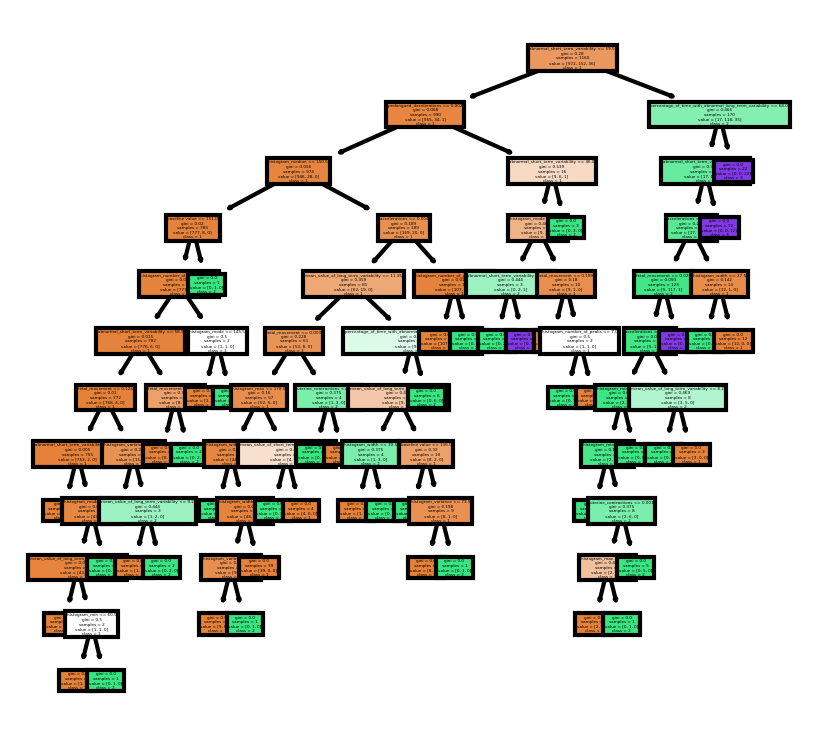

In [12]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (3,3), dpi=300)

tree.plot_tree(tree1,
               feature_names = train_X.columns, 
               class_names=np.unique(train_y).astype('str'),
               filled = True)

AUC-ROC Curve Without Removing any node

In [13]:
predict_values=tree1.predict_proba(test_X)
fpr={}
tpr={}
threshold={}
number_class=3
for x in range(number_class):
  fpr[x],tpr[x],threshold[x]=roc_curve(test_y,predict_values[:,x],pos_label=x+1)
  

[]

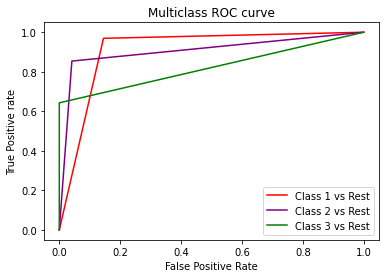

In [14]:
plt.plot(fpr[0], tpr[0],color='red', label='Class 1 vs Rest')
plt.plot(fpr[1], tpr[1], color='purple', label='Class 2 vs Rest')
plt.plot(fpr[2], tpr[2], color='green', label='Class 3 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend()
plt.plot()

Removing Random Node From Decision Tree

In [15]:
#Features List From tree
feature_list = tree1.tree_.feature
feature_list

array([ 7,  6, 18,  0, 15,  7,  2,  7, -2, 16, 10, -2, 12, -2, -2, -2, 19,
       -2, 10, -2, -2,  2, -2, -2, 16, -2, -2, -2,  1, 10,  2, 13, 11, -2,
       11, 19, -2, -2, -2,  8, -2, -2,  3, -2, -2,  9, 10, 11, -2, -2,  0,
       -2, 19, -2, -2, -2, 14, -2, -2,  7, 16,  7, -2, -2,  2, -2, 14, -2,
       -2, -2,  9,  7,  1,  2,  1, 12, 12, -2,  3, 13, -2, -2, -2, -2, 10,
       -2, -2, -2, 11, -2, -2, -2, -2])

In [16]:
#Left Child List of corresponding feature in feature_list where every element is an index of the child present in feature_list
left_child_list = tree1.tree_.children_left
left_child_list

array([ 1,  2,  3,  4,  5,  6,  7,  8, -1, 10, 11, -1, 13, -1, -1, -1, 17,
       -1, 19, -1, -1, 22, -1, -1, 25, -1, -1, -1, 29, 30, 31, 32, 33, -1,
       35, 36, -1, -1, -1, 40, -1, -1, 43, -1, -1, 46, 47, 48, -1, -1, 51,
       -1, 53, -1, -1, -1, 57, -1, -1, 60, 61, 62, -1, -1, 65, -1, 67, -1,
       -1, -1, 71, 72, 73, 74, 75, 76, 77, -1, 79, 80, -1, -1, -1, -1, 85,
       -1, -1, -1, 89, -1, -1, -1, -1])

In [17]:
#Right Child List of corresponding feature in feature_list where every element is an index of the child present in  feature_list
right_child_list = tree1.tree_.children_right
right_child_list

array([70, 59, 28, 27, 24, 21, 16,  9, -1, 15, 12, -1, 14, -1, -1, -1, 18,
       -1, 20, -1, -1, 23, -1, -1, 26, -1, -1, -1, 56, 45, 42, 39, 34, -1,
       38, 37, -1, -1, -1, 41, -1, -1, 44, -1, -1, 55, 50, 49, -1, -1, 52,
       -1, 54, -1, -1, -1, 58, -1, -1, 69, 64, 63, -1, -1, 66, -1, 68, -1,
       -1, -1, 92, 91, 88, 87, 84, 83, 78, -1, 82, 81, -1, -1, -1, -1, 86,
       -1, -1, -1, 90, -1, -1, -1, -1])

In [18]:
#Selecting random node from the feature_list which we will remove. 
random_node_choice = random.choice(feature_list)

while random_node_choice == _tree.TREE_UNDEFINED or feature_list[0]==random_node_choice:
  random_node_choice = random.choice(tree1.tree_.feature)

random_node_choice


3

In [19]:
# Getting index of the random node from feature_list
node_itself = np.where(feature_list == random_node_choice)[0][0]
node_itself

42

In [20]:
#Flags to know that random node is which child of its parent
parent_left_child=False
parent_right_child = False

#Check to know to which list it belongs as a child
if node_itself in left_child_list:
  #Setting flag true accordingly
  parent_left_child=True
  #Getting index of parent in the "parent" variable from left_child_list because child's index in left_child_list is same as parent
  parent = np.where(left_child_list==node_itself)[0][0]

  #Getting feature name for more clarity
  parent_feature_name = tree1.tree_.feature[parent] #parent name
else:
  parent_right_child=True
  parent = np.where(right_child_list==node_itself)[0][0]
  parent_feature_name = tree1.tree_.feature[parent] #parent name

#Printing parent, parent feature name  and to which child is the random node belong which we want to remove
parent  , parent_feature_name, parent_left_child, parent_right_child

(30, 2, False, True)

In [21]:
#Getting the left child and right child index of the random node which we want to delete
left_child = tree1.tree_.children_left[node_itself] #left child index in feature list
right_child = tree1.tree_.children_right[node_itself] #right child index in feature list

left_child, right_child

(43, 44)

In [22]:
#Fetching impurtiy of the child node's . So, that child with the maximum impurity will get replaced with the random node we want to delete
left_child_impurity = tree1.tree_.impurity[left_child]
right_child_impurity = tree1.tree_.impurity[right_child]

left_child_impurity, right_child_impurity

(0.0, 0.0)

In [23]:
  #Checking the impurity and then removing the node accordingly
  if parent_left_child == True:
    if left_child_impurity > right_child_impurity:
      #Left_child list will be replaced at the same index with the left_child of the random node if it has higher impurity than its right child
      left_child_list[parent] = left_child
    else:
      left_child_list[parent] = right_child
  elif parent_right_child == True:
    if left_child_impurity > right_child_impurity:
      right_child_list[parent] = left_child
    else:
      right_child_list[parent] = right_child
  

In [24]:
#Accuracy with removing any random node
tree1.score(test_X,test_y)

0.9310344827586207

In [25]:
y_predict=tree1.predict(test_X)

In [26]:
#Precision with removing any random node
precision_value=precision_score(test_y,y_predict,average='macro')
precision_value

0.918903318903319

In [27]:
#Recall with removing any random node
recall_value=recall_score(test_y,y_predict,average='macro')
recall_value

0.8151629072681704

AUC-Roc Curve after deleting random node from tree

In [28]:
predict_values=tree1.predict_proba(test_X)
fpr={}
tpr={}
threshold={}
number_class=3
for x in range(number_class):
  fpr[x],tpr[x],threshold[x]=roc_curve(test_y,predict_values[:,x],pos_label=x+1)
  

[]

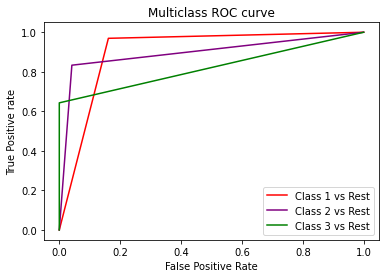

In [29]:
plt.plot(fpr[0], tpr[0],color='red', label='Class 1 vs Rest')
plt.plot(fpr[1], tpr[1], color='purple', label='Class 2 vs Rest')
plt.plot(fpr[2], tpr[2], color='green', label='Class 3 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend()
plt.plot()

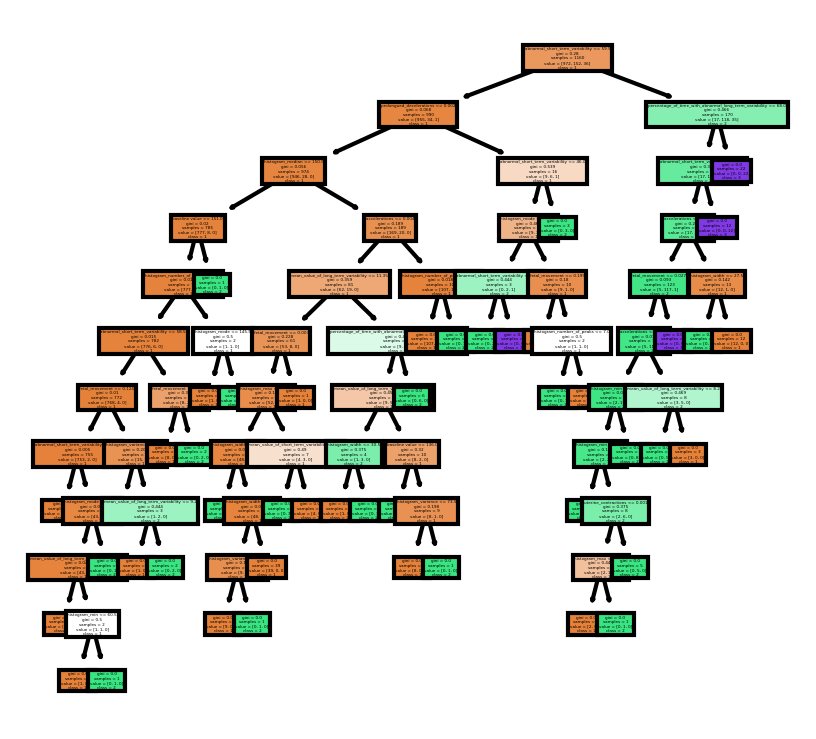

In [30]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (3,3), dpi=300)

tree.plot_tree(tree1,
               feature_names = train_X.columns, 
               class_names=np.unique(train_y).astype('str'),
               filled = True)
plt.savefig('DT_B_1.jpg')